In [8]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Microsoft Visual Studio\Shared\Python37_64\python.exe -m pip install --upgrade pip' command.


In [2]:
#training
trainingPath=r'adult_data(N)_v1.csv'
trainingData=[]
import csv
with open(trainingPath, "r", newline="") as csvData:
  reader = csv.reader(csvData)
  for r in reader:
     trainingData.append(r)
Xtraining=[]
ytraining=[]
#Feature Label
feature=[]
#Pure Data
pureData=[]
for r in range(0,len(trainingData)):
    #Row Data
    rowData=[]
    for c in range(0,len(trainingData[r])):
        rowData.append(trainingData[r][c])
    if(r==0):
        feature=rowData
    else:
        pureData.append(rowData)
Xtraining=[]
ytraining=[]
for r in range(0,len(pureData)):
    #Row Data
    rowData=[]
    for c in range(0,len(pureData[r])-1):
        rowData.append(float(pureData[r][c]))
    Xtraining.append(rowData)
    ytraining.append(float(pureData[r][len(pureData[r])-1]))
#test
testPath=r'adult_test(N)_v1.csv'
testData=[]
import csv
with open(testPath, "r", newline="") as csvData:
  reader = csv.reader(csvData)
  for r in reader:
     testData.append(r)
#Pure Data
pureData=[]
for r in range(0,len(testData)):
    #Row Data
    rowData=[]
    for c in range(0,len(testData[r])):
        rowData.append(testData[r][c])
    if(r!=0):
        pureData.append(rowData)
Xtest=[]
ytest=[]
for r in range(0,len(pureData)):
    #Row Data
    rowData=[]
    for c in range(0,len(pureData[r])-1):
        rowData.append(float(pureData[r][c]))
    Xtest.append(rowData)
    ytest.append(float(pureData[r][len(pureData[r])-1]))

In [3]:
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(Xtraining, ytraining)
ypred =model.predict(Xtest)

Text(0.5, 1.0, 'XGBoost')

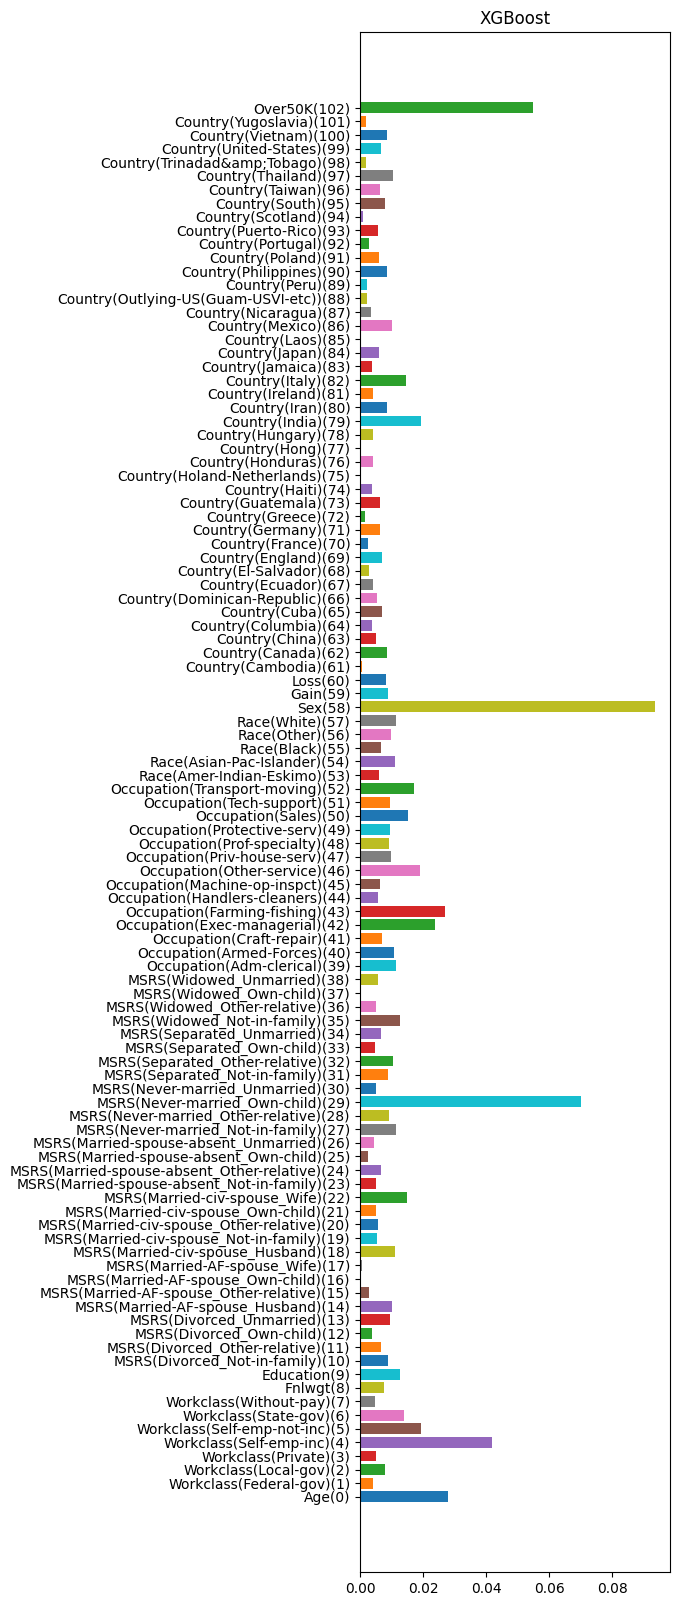

In [4]:
import numpy as np
import matplotlib.pyplot as FeturePlt
feature_Importance=[]
for f in model.feature_importances_:
    feature_Importance.append(f)
FeturePlt.figure(figsize=(4,20))
for f in range(0,len(feature_Importance)):
    FeturePlt.barh(feature[f]+"("+str(f)+")", feature_Importance[f])
FeturePlt.title("XGBoost")

訓練準確率:  0.4460523276454412
測試準確率:  0.24679100857337133
MSE:  109.59359430805038
RMSE:  10.468695922035867
MAPE:  0.26304815169224405


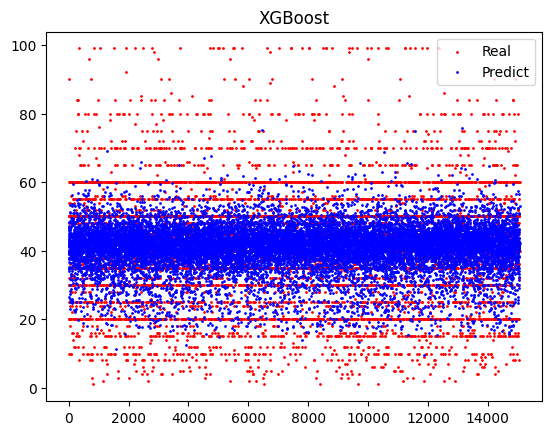

In [6]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
mse = mean_squared_error(ytest, ypred)
rmse=math.sqrt(mse)
mape=mean_absolute_percentage_error(ytest, ypred)
print("訓練準確率: ",model.score(Xtraining, ytraining))
print("測試準確率: ",model.score(Xtest, ytest))
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAPE: ", mape)
x_ax = range(len(ytest))
import matplotlib.pyplot as plt
plt.scatter(x_ax, ytest, label="Real",color="red",s=1)
plt.scatter(x_ax, ypred, label="Predict",color="blue",s=1)
plt.title("XGBoost")
plt.legend()
plt.show()

訓練準確率:  0.4283343908419224
測試準確率:  0.23975118287234898
MSE:  110.61790470617231
RMSE:  10.517504680587136
MAPE:  0.26340149644268895


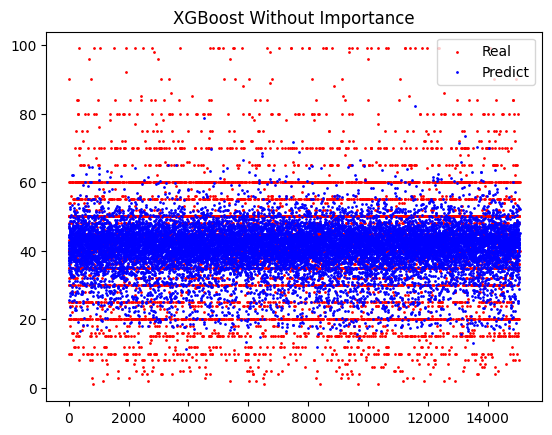

In [4]:
from xgboost import XGBRegressor
model = XGBRegressor()
XtrainWithoutImport=[]
XtestWithoutImport=[]
for tra in range(0,len(Xtraining)):
    daArray=[]
    for col in range(0,len(Xtraining[tra])):
        if(col!=29 and col!=58 and col!=102):
            daArray.append(Xtraining[tra][col])
    XtrainWithoutImport.append(daArray)
for tra in range(0,len(Xtest)):
    daArray=[]
    for col in range(0,len(Xtest[tra])):
        if(col!=29 and col!=58 and col!=102):
            daArray.append(Xtest[tra][col])
    XtestWithoutImport.append(daArray)
model.fit(XtrainWithoutImport, ytraining)
ypred = model.predict(XtestWithoutImport)
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
mse = mean_squared_error(ytest, ypred)
rmse=math.sqrt(mse)
mape=mean_absolute_percentage_error(ytest, ypred)
print("訓練準確率: ",model.score(XtrainWithoutImport, ytraining))
print("測試準確率: ",model.score(XtestWithoutImport, ytest))
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAPE: ", mape)
import matplotlib.pyplot as plt
x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, label="Real",color="red",s=1)
plt.scatter(x_ax, ypred, label="Predict",color="blue",s=1)
plt.title("XGBoost Without Importance")
plt.legend()
plt.show()

訓練準確率:  0.13608710313703698
測試準確率:  0.1313288807938119
MSE:  126.39359236151222
RMSE:  11.242490487499298
MAPE:  0.3009160443231023


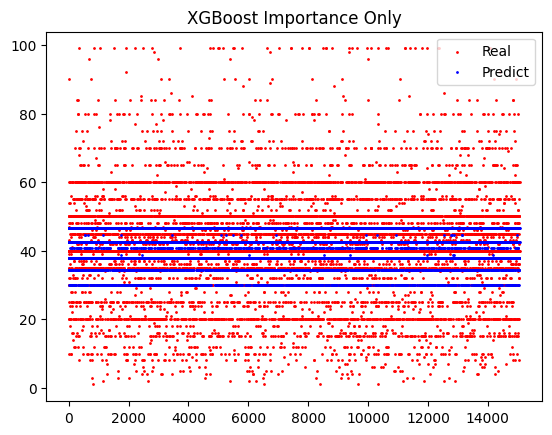

In [8]:
from xgboost import XGBRegressor
model = XGBRegressor()
XtrainWithoutImport=[]
XtestWithoutImport=[]
for tra in range(0,len(Xtraining)):
    daArray=[]
    for col in range(0,len(Xtraining[tra])):
        if(col==29 or col==58 or col==102):
            daArray.append(Xtraining[tra][col])
    XtrainWithoutImport.append(daArray)
for tra in range(0,len(Xtest)):
    daArray=[]
    for col in range(0,len(Xtest[tra])):
        if(col==29 or col==58 or col==102):
            daArray.append(Xtest[tra][col])
    XtestWithoutImport.append(daArray)
model.fit(XtrainWithoutImport, ytraining)
ypred = model.predict(XtestWithoutImport)
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
mse = mean_squared_error(ytest, ypred)
rmse=math.sqrt(mse)
mape=mean_absolute_percentage_error(ytest, ypred)
print("訓練準確率: ",model.score(XtrainWithoutImport, ytraining))
print("測試準確率: ",model.score(XtestWithoutImport, ytest))
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAPE: ", mape)
import matplotlib.pyplot as plt
x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, label="Real",color="red",s=1)
plt.scatter(x_ax, ypred, label="Predict",color="blue",s=1)
plt.title("XGBoost Importance Only")
plt.legend()
plt.show()